In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df=pd.read_csv("Downloads/Diamonds Prices2022.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53943, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

<Axes: xlabel='cut', ylabel='count'>

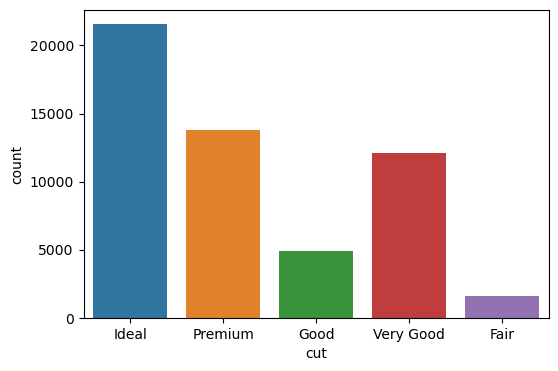

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['cut'])

In [20]:
df['color'].value_counts()

color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

<Axes: xlabel='color', ylabel='count'>

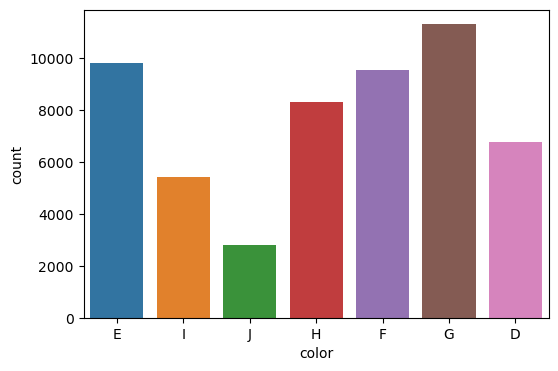

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['color'])

In [22]:
df['clarity'].value_counts()

clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

<Axes: xlabel='clarity', ylabel='count'>

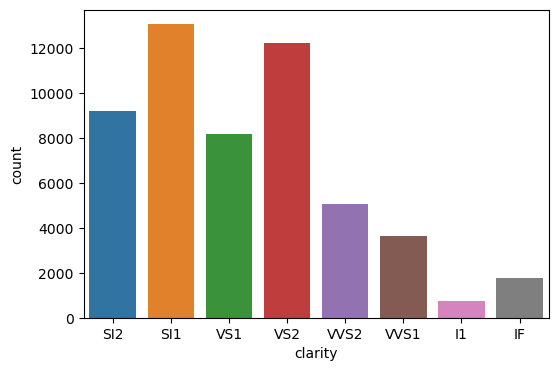

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['clarity'])

Text(0.5, 1.0, 'PRICE VS CUT')

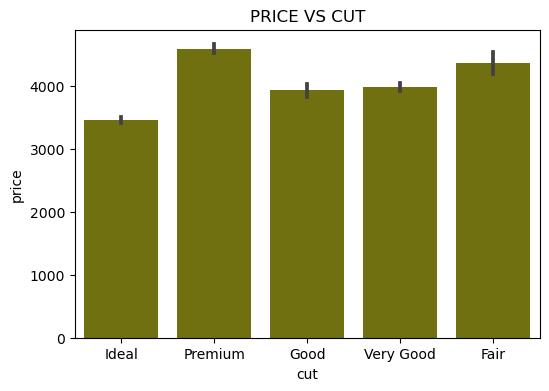

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['cut'],y=df['price'],color='olive')
plt.title('PRICE VS CUT')

Text(0.5, 1.0, 'PRICE VS COLOR')

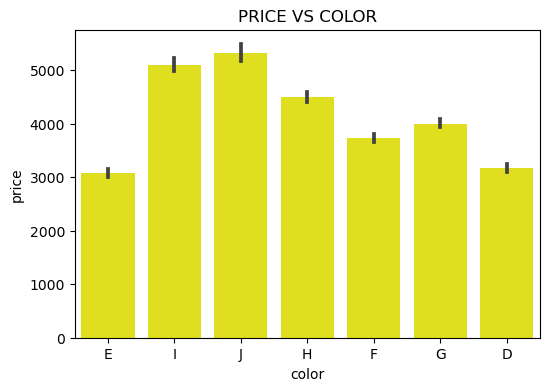

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['color'],y=df['price'],color='yellow')
plt.title('PRICE VS COLOR')

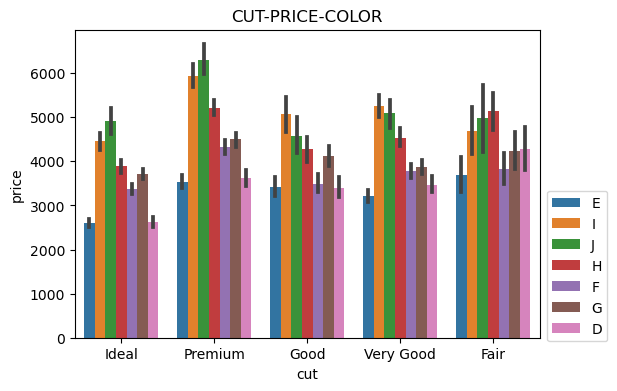

In [17]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['cut'],y=df['price'],hue=df['color'])
plt.title('CUT-PRICE-COLOR')
plt.legend(bbox_to_anchor=(1, 0.5)) 

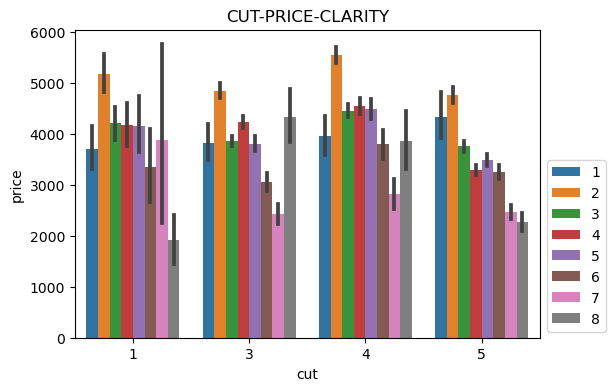

In [71]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['cut'],y=df['price'],hue=df['clarity'])
plt.title('CUT-PRICE-CLARITY')
plt.legend( bbox_to_anchor=(1, 0.6)) 

In [5]:
df['cut']=df['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':3,'Fair':1})
df['color']=df['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df['clarity']=df['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_tranform(df[i])

In [7]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,6,5,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,1,2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df=df.drop('Unnamed: 0',axis=1)

In [9]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [12]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,3.995032,4.405873,4.050980,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,0.991498,1.701087,1.647103,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df=df.drop(df[df['x']==0].index)
df=df.drop(df[df['y']==0].index)
df=df.drop(df[df['z']==0].index)
df.shape

(53923, 10)

In [12]:
lst3=['carat','depth','table','x','y','z']
for i in lst3:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower=q1-(iqr*1.5)
    upper=q3+(iqr*1.5)        

In [13]:
df1=df[(df[i]>=lower)&(df[i]<=upper)]

In [14]:
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,5,7,2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,4,6,3,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,4,5,3,59.8,62.0,2756,5.74,5.73,3.43


<Axes: >

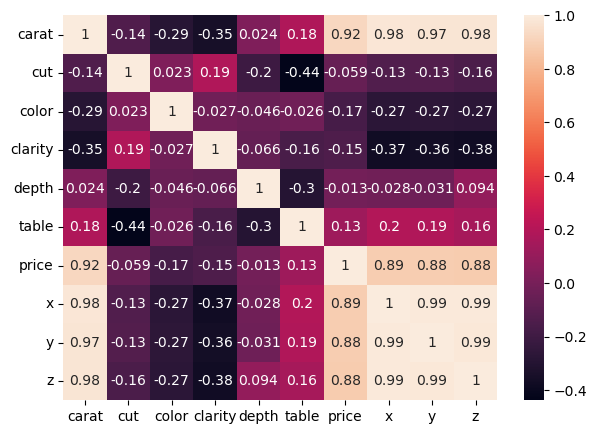

In [38]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(),annot=True)

In [15]:
x=df1.drop('price',axis=1)

In [16]:
y=df1['price']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [18]:
SC_X = StandardScaler()
x_train = SC_X.fit_transform(x_train)
x_test = SC_X.transform(x_test)

In [61]:
training_score = []
testing_score = []
rmse=[]
#cvs=[]

In [64]:
def model_prediction(model):
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    a = r2_score(y_train,y_train_pred)*100
    b = r2_score(y_test,y_test_pred)*100
    #d=cross_val_score(model,x,y,cv=5,).mean()
    c = mean_squared_error(y_test, y_test_pred)
    training_score.append(a)
    testing_score.append(b)
    #cvs.append(d)
    rmse.append(c)


    print(f"R2_Score of {model} model on Training Data is:",a)
    print(f"R2_Score of {model} model on Testing Data is:",b)
    #print(f"Cross_Valuation_Score of {model} model is",d)
    print(f"MSE of {model} model on Testing Data is:",c)

In [65]:
model_prediction(LinearRegression())

R2_Score of LinearRegression() model on Training Data is: 91.26988063691547
R2_Score of LinearRegression() model on Testing Data is: 91.26063952651353
MSE of LinearRegression() model on Testing Data is: 1352144.676658903


In [22]:
model_prediction(RandomForestRegressor())

R2_Score of RandomForestRegressor() model on Training Data is: 99.73948719272549
R2_Score of RandomForestRegressor() model on Testing Data is: 98.12570605152385
RMSE of RandomForestRegressor() model on Testing Data is: 289988.79181316023


In [23]:
model_prediction(DecisionTreeRegressor())

R2_Score of DecisionTreeRegressor() model on Training Data is: 99.99944101580456
R2_Score of DecisionTreeRegressor() model on Testing Data is: 96.50376819447293
RMSE of DecisionTreeRegressor() model on Testing Data is: 540933.3141196116


In [24]:
model_prediction(XGBRegressor())

R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on Training Data is: 99.11366415775919
R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_

In [25]:
model_prediction(GradientBoostingRegressor())

R2_Score of GradientBoostingRegressor() model on Training Data is: 97.77204863645629
R2_Score of GradientBoostingRegressor() model on Testing Data is: 97.64796479761182
RMSE of GradientBoostingRegressor() model on Testing Data is: 363904.41701906186


In [27]:
models=['Linear Regression','RandomForestRegressor','Decision Tree Regressor','XGBoostRegressor','GradientBoostingRegressor']

In [39]:
compare_models = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,"MSE":rmse})
compare_models

,Algorithms,Training Score,Testing Score,MSE
0,Linear Regression,91.269881,91.260640,1.352145e+06
1,RandomForestRegressor,99.739487,98.125706,2.899888e+05
2,Decision Tree Regressor,99.999441,96.503768,5.409333e+05
3,XGBoostRegressor,99.113664,98.138832,2.879580e+05
4,GradientBoostingRegressor,97.772049,97.647965,3.639044e+05


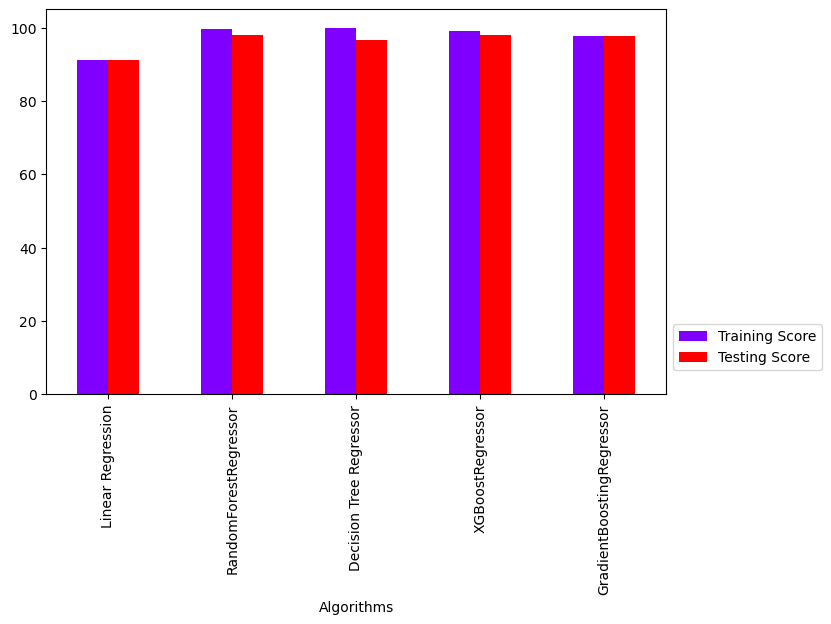

In [47]:

compare_models.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(8,5),kind="bar",colormap="rainbow")
plt.legend(bbox_to_anchor=(1,0.2))
plt.show()

In [31]:
#Performance Visualzation of Different Models by R2 Score

<Figure size 600x400 with 0 Axes>

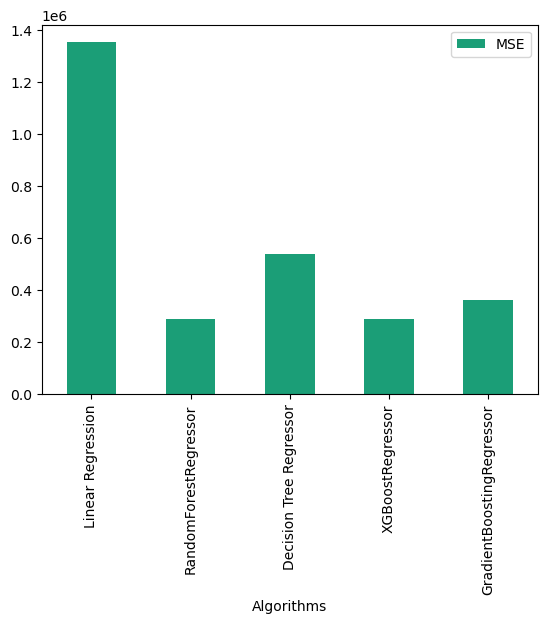

In [40]:
plt.figure(figsize=(6,4))
compare_models.plot(x="Algorithms",y=["MSE"],kind="bar",colormap="Dark2")
plt.show()

# random forest

In [58]:
rF=RandomForestRegressor()
rF.fit(x_train,y_train)
y_pred=rF.predict(x_test)
df5=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
df5

,Actual Values,Predicted Values
32225,789,789.6100
27670,18680,16565.8525
42421,1312,1245.7100
23371,631,599.7400
25925,15081,15307.1200
...,...,...
13605,5567,5084.9300
25336,14039,13686.5400
43022,1371,1242.9300
20449,8795,9297.9700


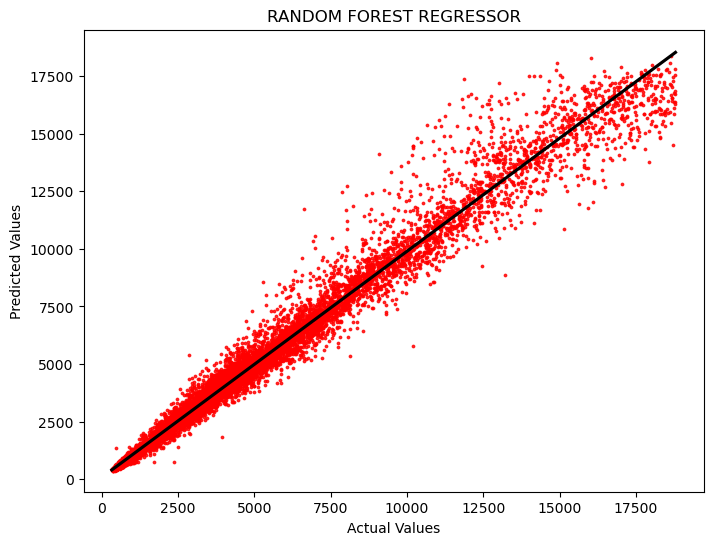

In [74]:
fig = plt.figure(figsize=(8, 6), dpi=100)
sns.regplot(data=df5, x='Actual Values', y='Predicted Values', color='red',
            scatter=True, line_kws={"color": "black"}, scatter_kws={'s': 3})
plt.title('RANDOM FOREST REGRESSOR');

# linear regression

In [54]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
df4=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
df4

,Actual Values,Predicted Values
32225,789,1454.773808
27670,18680,15303.995124
42421,1312,595.766623
23371,631,16.481750
25925,15081,8227.564910
...,...,...
13605,5567,6585.798583
25336,14039,10655.621800
43022,1371,1295.350120
20449,8795,7767.462849


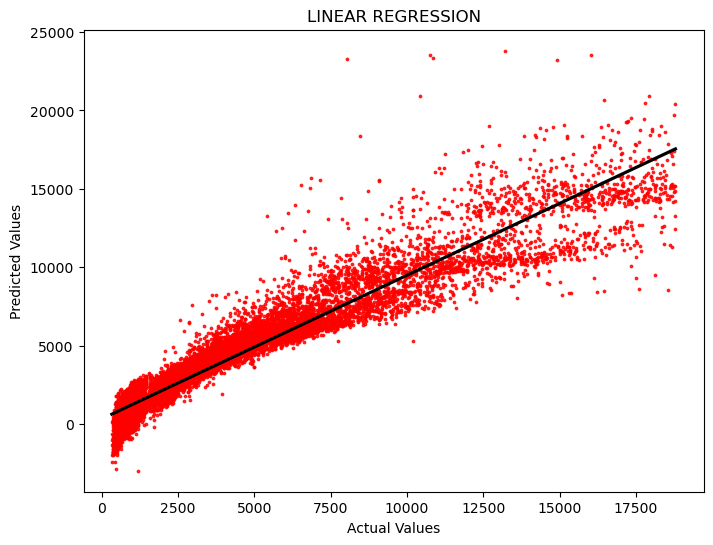

In [73]:
fig = plt.figure(figsize=(8, 6), dpi=100)
sns.regplot(data=df4, x='Actual Values', y='Predicted Values', color='red',
            scatter=True, line_kws={"color": "black"}, scatter_kws={'s': 3})
plt.title('LINEAR REGRESSION');

# xgb regressor

In [48]:
xg=XGBRegressor()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
df3=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
df3

,Actual Values,Predicted Values
32225,789,810.197021
27670,18680,17891.603516
42421,1312,1317.342773
23371,631,686.025452
25925,15081,14844.622070
...,...,...
13605,5567,4821.417969
25336,14039,13547.350586
43022,1371,1336.490723
20449,8795,8407.199219


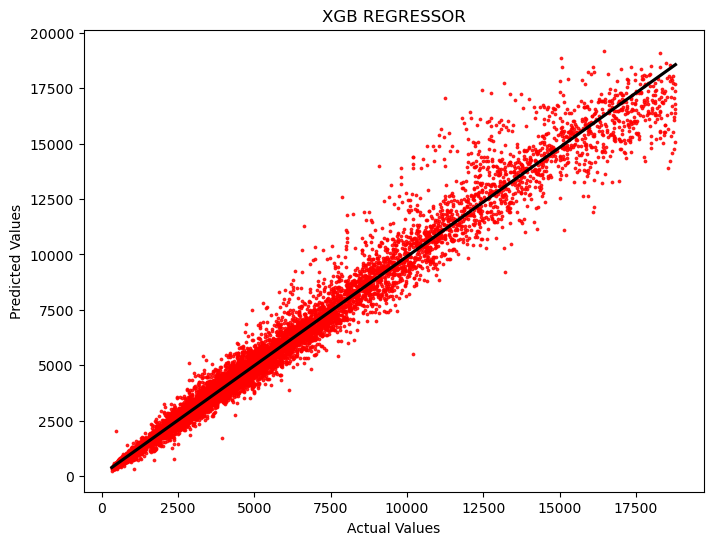

In [72]:
fig = plt.figure(figsize=(8, 6), dpi=100)
sns.regplot(data=df3, x='Actual Values', y='Predicted Values', color='red',
            scatter=True, line_kws={"color": "black"}, scatter_kws={'s': 3})
plt.title('XGB REGRESSOR');

# decision tree

In [66]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
df6=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
df6

,Actual Values,Predicted Values
32225,789,789.0
27670,18680,16224.0
42421,1312,1363.0
23371,631,631.0
25925,15081,15081.0
...,...,...
13605,5567,5257.0
25336,14039,13912.0
43022,1371,1221.0
20449,8795,10685.0


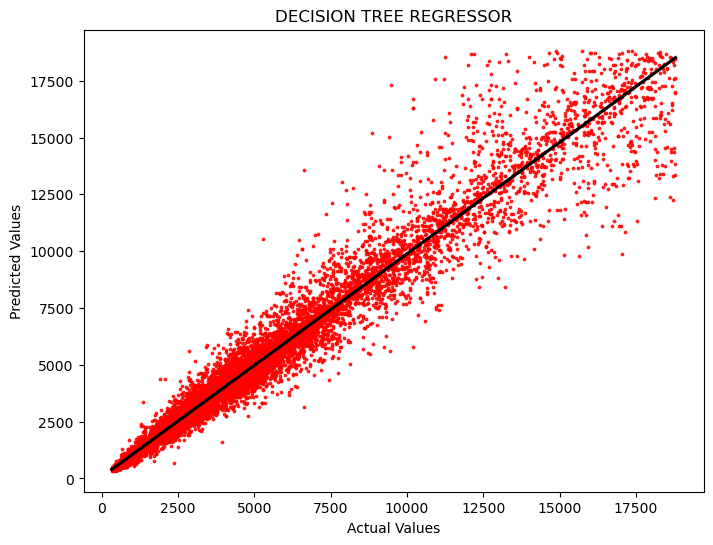

In [71]:
fig = plt.figure(figsize=(8, 6), dpi=100)
sns.regplot(data=df6, x='Actual Values', y='Predicted Values', color='red',
            scatter=True, line_kws={"color": "black"}, scatter_kws={'s': 3})
plt.title('DECISION TREE REGRESSOR');

In [68]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
df7=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
df7

,Actual Values,Predicted Values
32225,789,898.529159
27670,18680,17684.076487
42421,1312,1446.739732
23371,631,453.816228
25925,15081,13501.831336
...,...,...
13605,5567,5492.461363
25336,14039,13741.938000
43022,1371,1464.619273
20449,8795,8466.385790


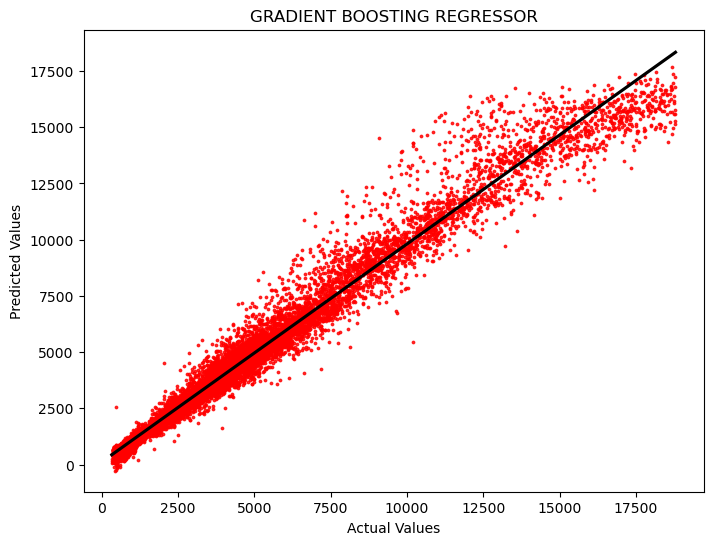

In [70]:
fig = plt.figure(figsize=(8, 6), dpi=100)
sns.regplot(data=df7, x='Actual Values', y='Predicted Values', color='red',
            scatter=True, line_kws={"color": "black"}, scatter_kws={'s': 3})
plt.title('GRADIENT BOOSTING REGRESSOR');